In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Algorithms/Mall_Customers.csv')
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

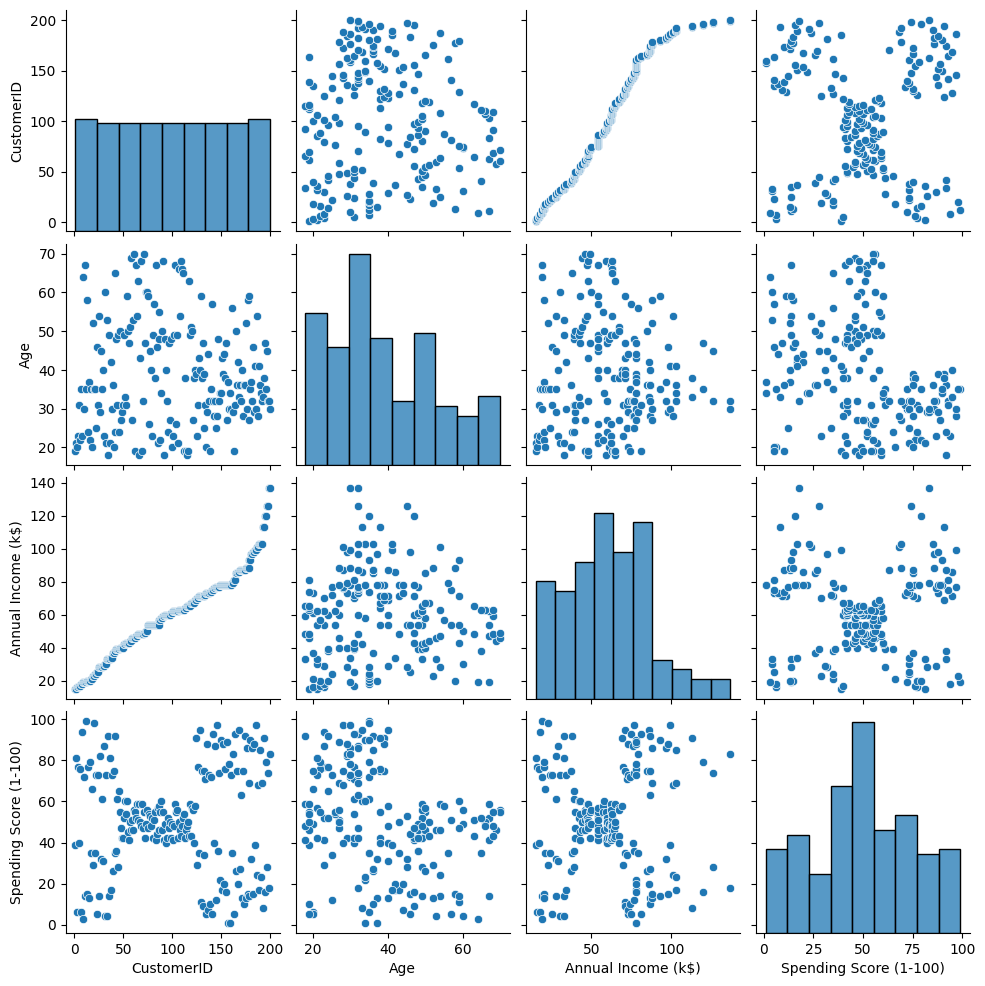

In [ ]:
sns.pairplot(dataset)

WCSS measures how well the data points are clustered around their respective centroids.

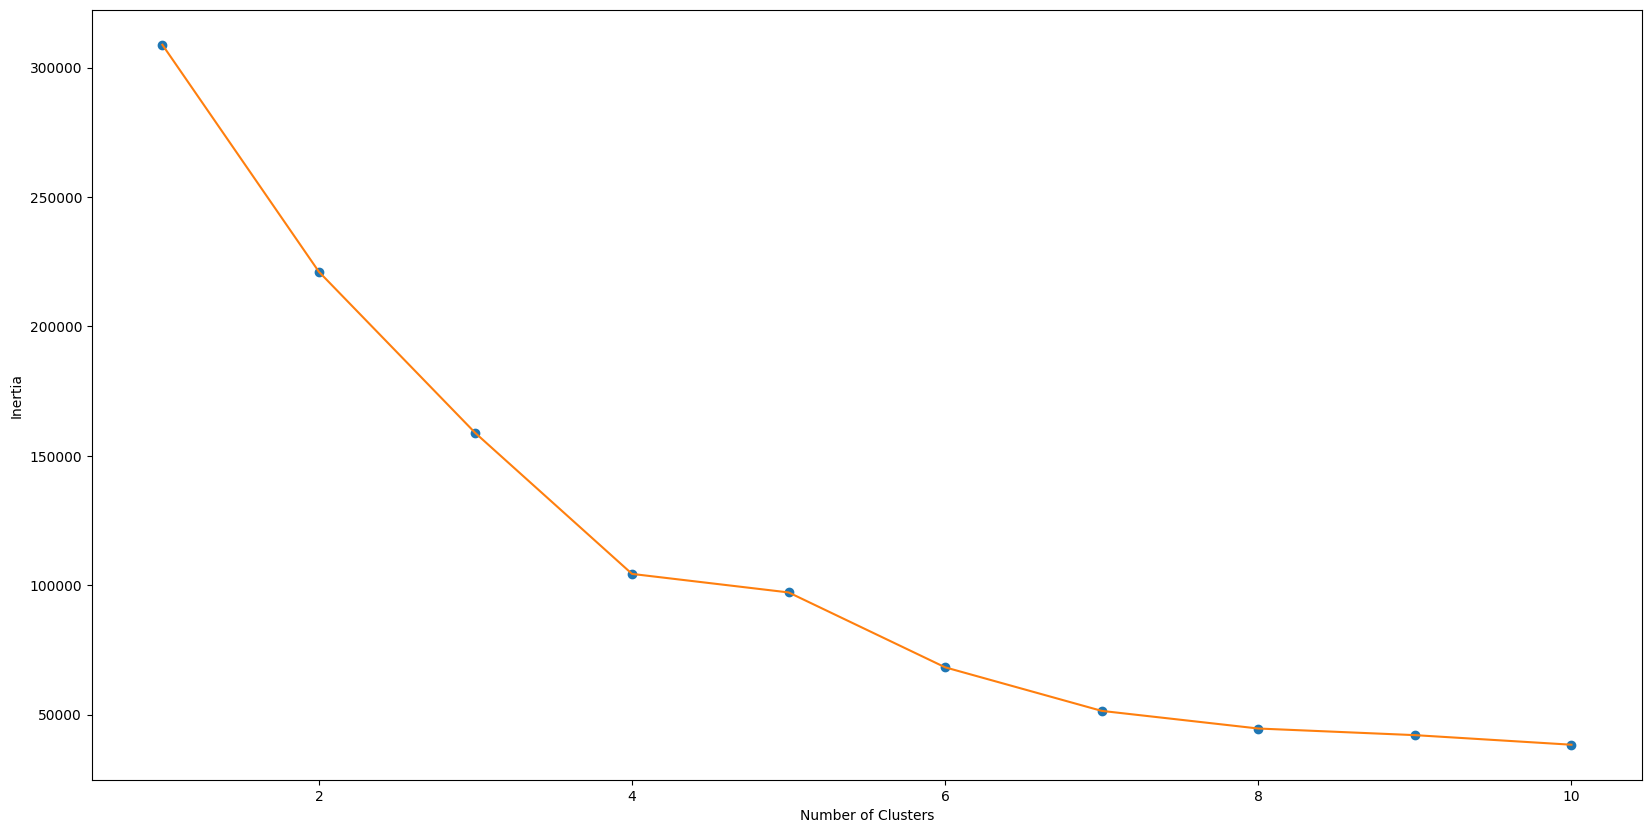

In [ ]:
from sklearn.cluster import KMeans

X3 = dataset.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
                #n_init =4,
               random_state=42)
    model.fit(X3)
    inertia.append(model.inertia_)

# max_iter = maximum number of iterations the algorithm will run for a single initialization.
# Each iteration consists of:
# Assign step: Assign each point to the nearest centroid.
# Update step: Recompute centroids as the mean of assigned points.

plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


In [ ]:
model = KMeans(n_clusters = 5,
            init='k-means++',

            max_iter=500,
            random_state=42)
model.fit(X3)
labels = model.labels_
#centroids = model.cluster_centers_

dataset['cluster'] =  labels
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        2  
1        2  
2        0  
3        2  
4        0

In [ ]:
dataset['cluster'].unique()

array([2, 0, 4, 3, 1], dtype=int32)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(dataset,
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",
                    color='cluster',
                    hover_data=["Age",
                                "Annual Income (k$)",
                                "Spending Score (1-100)"],
                    category_orders = {"cluster": range(0, 5)},
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# adding gender column also

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
le = LabelEncoder()
dataset['Gender_encoded'] = le.fit_transform(dataset['Gender'])


X4 = dataset.loc[:, ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


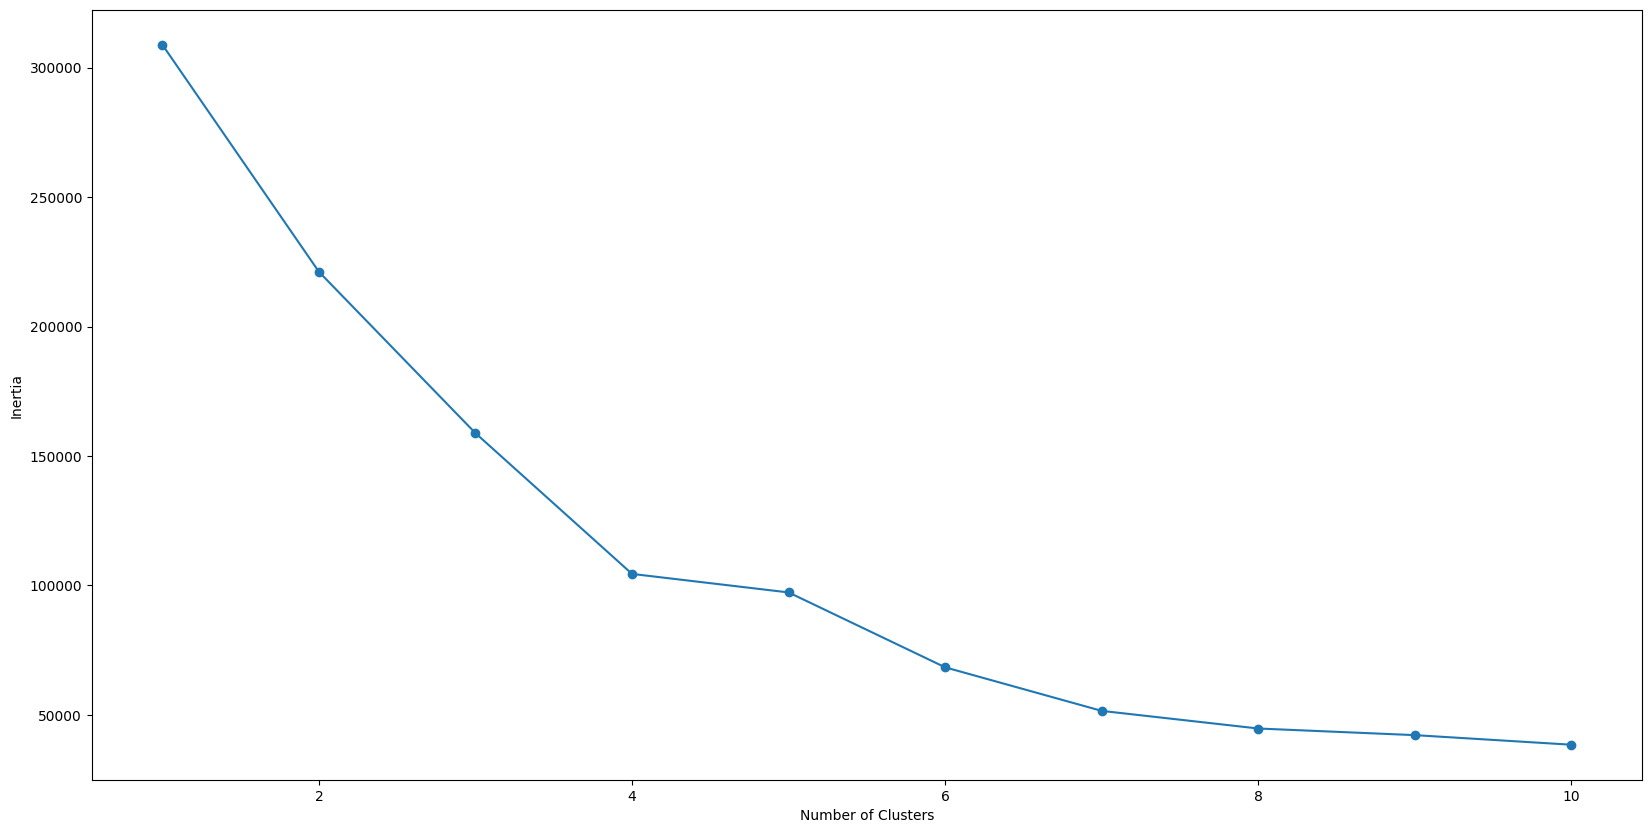

In [ ]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
                   init='k-means++',
                   max_iter=500,
                   random_state=42)
    model.fit(X4)
    inertia.append(model.inertia_)

plt.figure(1 , figsize = (20, 10))
plt.plot(np.arange(1 , 11) , inertia , 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(dataset,
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",
                    color="cluster",   # cluster colors
                    symbol="Gender",   # different shapes for Male/Female
                    hover_data=["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"],
                    category_orders={"cluster": range(0, 5)}
                   )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [ ]:
model = KMeans(n_clusters = 4,
            init='k-means++',

            max_iter=500,
            random_state=42)
model.fit(X4)
labels = model.labels_
#centroids = model.cluster_centers_

dataset['cluster'] =  labels
dataset.head()

NameError: name 'X4' is not defined

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X4, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.4052954330641215


# Hierarchical clustering

In [ ]:
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [ ]:
X3 = dataset.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

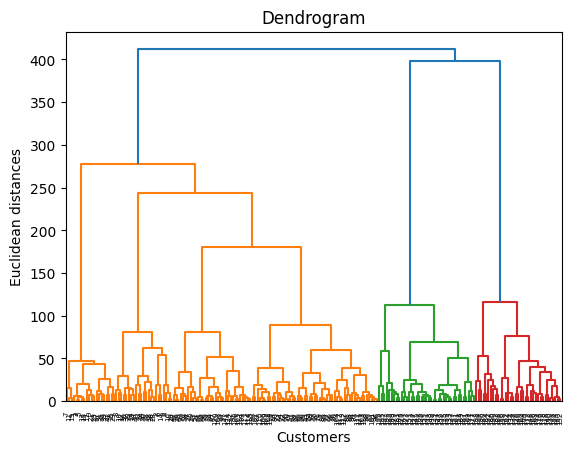

In [ ]:
import scipy.cluster.hierarchy as sc
dendrogram = sc.dendrogram(sc.linkage(X3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
## Import clustering module
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hca = hca.fit_predict(X3)

In [ ]:
y_hca

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
dataset['cluster_hca'] = y_hca

In [ ]:
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster_hca  
0            4  
1            3  
2            4  
3            3  
4            4

In [ ]:
dataset['cluster_hca'].unique()

array([4, 3, 0, 2, 1])

In [ ]:
dataset['cluster_hca'].value_counts()

cluster_hca
0    83
2    39
1    35
4    23
3    20
Name: count, dtype: int64

In [ ]:
fig = px.scatter_3d(dataset,
                    x="Age",
                    y="Annual Income (k$)",
                    z="Spending Score (1-100)",
                    color='cluster_hca',
                    hover_data=["Age",
                                "Annual Income (k$)",
                                "Spending Score (1-100)"],
                    category_orders = {"cluster": range(0, 6)},
                    )

#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X3, y_hca)
print("Silhouette Score:", score)

Silhouette Score: 0.4401889024290193


# DBSCAN

In [35]:
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [9]:
x = dataset.iloc[:, [3, 4]].values


In [36]:
X3 = dataset.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [7]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X3_scaled = scaler.fit_transform(X3)

In [33]:
#X3_scaled.shape

# k distance graph

In [37]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X3)
distances, indices = neighbors_fit.kneighbors(X3)


In [38]:
distances = np.sort(distances[:, 3])

distances


array([ 3.74165739,  4.12310563,  4.12310563,  4.12310563,  4.24264069,
        4.24264069,  4.35889894,  4.47213595,  4.47213595,  4.58257569,
        4.58257569,  4.58257569,  4.58257569,  4.58257569,  4.58257569,
        4.69041576,  4.69041576,  4.69041576,  4.69041576,  4.89897949,
        5.19615242,  5.19615242,  5.19615242,  5.19615242,  5.38516481,
        5.38516481,  5.38516481,  5.38516481,  5.38516481,  5.47722558,
        5.47722558,  5.47722558,  5.74456265,  5.83095189,  5.83095189,
        5.83095189,  5.83095189,  5.83095189,  5.91607978,  6.08276253,
        6.08276253,  6.08276253,  6.164414  ,  6.164414  ,  6.164414  ,
        6.40312424,  6.40312424,  6.40312424,  6.4807407 ,  6.63324958,
        6.63324958,  6.70820393,  6.70820393,  6.70820393,  7.        ,
        7.07106781,  7.07106781,  7.07106781,  7.14142843,  7.14142843,
        7.14142843,  7.14142843,  7.14142843,  7.21110255,  7.21110255,
        7.21110255,  7.21110255,  7.28010989,  7.28010989,  7.28

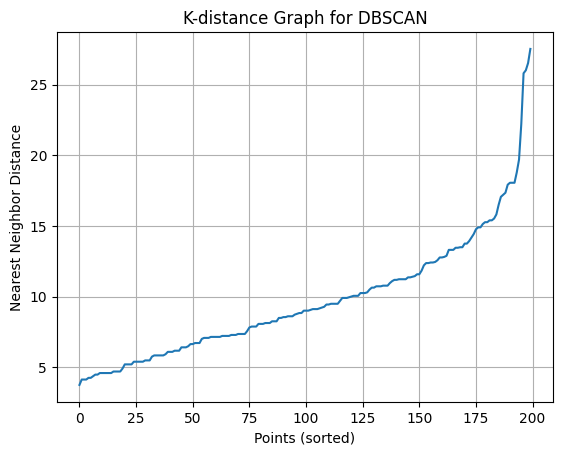

In [32]:
plt.plot(distances)
plt.title("K-distance Graph for DBSCAN")
plt.xlabel("Points (sorted)")
plt.ylabel("Nearest Neighbor Distance")
plt.grid(True)
plt.show()


1. Flat region (left side)

These points have small 4th-neighbor distances, meaning:

They lie in dense regions

They can form well-defined clusters

DBSCAN will label them as core points

This flat region is where the dataset has most of its cluster members.

2. Gradual slope (middle)

This section indicates:

Points are still in moderately dense neighborhoods

Distances increase slowly → no clear border yet

3. Sharp rise (right side) — THE ELBOW

This is the most important part.

Around this point, the 4th-neighbor distance increases sharply, meaning:

These points are far from neighbors

They are not part of any dense cluster

DBSCAN will label them as noise/outliers

The start of this sharp rise is called the "knee" or "elbow".

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 12, min_samples = 4)
model = dbscan.fit(X3)

In [40]:
model

DBSCAN(eps=12, min_samples=4)

In [41]:
labels = model.labels_
labels

array([-1,  0, -1,  0,  1,  0, -1, -1,  2,  0, -1, -1,  2,  0, -1,  0,  1,
        0,  1, -1,  1,  0,  2,  0,  2,  0,  1,  0,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  3,  0,  3, -1,  3,  4,  3, -1,  3,  5,  3,
        4,  3,  5,  3,  4,  3, -1,  3,  5,  3,  0,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3, -1,  3, -1,  3,  5,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,
       -1, -1,  3,  4, -1, -1,  3, -1, -1, -1, -1, -1, -1])

In [42]:
list(set(labels))

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(-1)]

# -1 outliers
# clusters = 0,1,2,3,4,5,6,7,8

In [18]:


sample_core = np.zeros_like(labels,dtype= bool)
sample_core

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
sample_core[model.core_sample_indices_] = True
sample_core

array([False,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
# calculating the number of clusters
#Checks if -1 (noise) is present.If yes, it subtracts 1 from the total, because noise does not count as a cluster.

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

6

In [44]:
from sklearn import metrics
print(metrics.silhouette_score(X3,labels))

0.19385774986665416


In [ ]:
[-1 ,1]

[-1, 1]

In [ ]:
# near to 1 good clustering

In [ ]:
dataset['cluster_db'] = labels

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

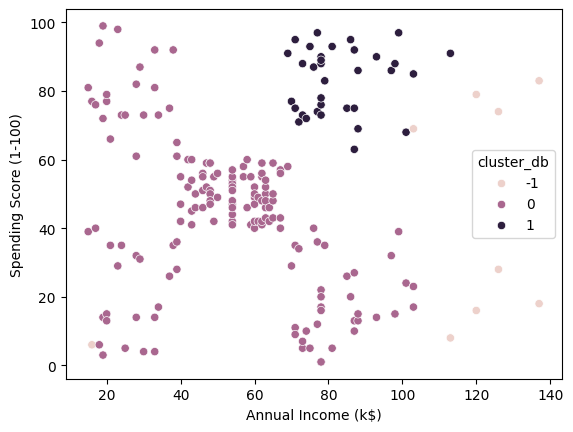

In [ ]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_db', data = dataset)

# GMM

Silhouette Score: 0.2999215712569053


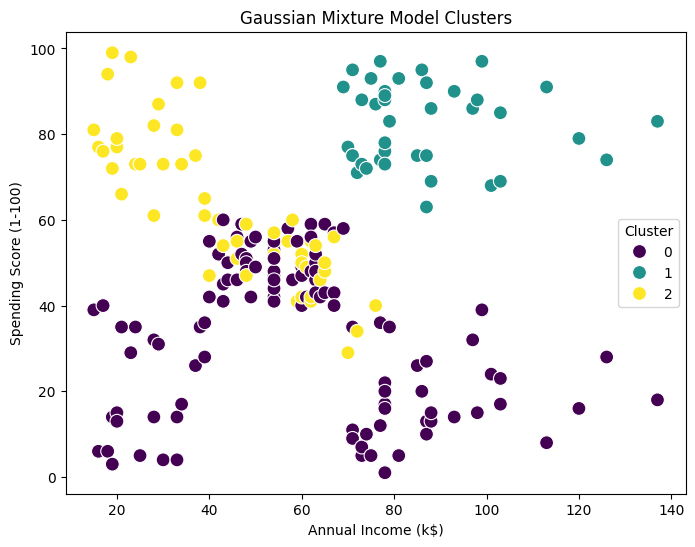

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



# Encode 'Gender'
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# Select relevant features for clustering
X = dataset[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data (GMM assumes Gaussian-distributed features)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# --- Step 2: Apply Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Get cluster labels
labels = gmm.predict(X)
dataset['Cluster'] = labels

# --- Step 3: Evaluate the clustering ---
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

# --- Step 4: Visualize the clusters ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['Annual Income (k$)'],
                y=dataset['Spending Score (1-100)'],
                hue=dataset['Cluster'],
                palette='viridis',
                s=100)
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
